In [74]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv(r"C:\Users\bhupe\Downloads\ML_ready.csv")

In [76]:
df=df.iloc[:,1:]
df.head()

,Property,Locality,Price,Area(Sq.ft),Status,Details,Bathrooms,Region,BHK,Property_Type
0,4 BHK Villa in Theme Signature One,Devanahalli,28000000.0,3195,Under Construction,Possession by Apr 20274 BathroomsNew,4,North Bangalore,4 BHK,Villa
1,4 BHK Villa in Theme Signature One,Devanahalli,28000000.0,3195,Under Construction,Possession by Apr 20274 BathroomsNew,4,North Bangalore,4 BHK,Villa
2,4 BHK Villa in Theme Signature One,Subramanyapura,28000000.0,3195,Under Construction,Possession by Apr 20274 BathroomsNew,4,South Bangalore,4 BHK,Villa
3,4 BHK Apartment in Prestige Raintree Park,Brookefield,40500000.0,3200,Under Construction,Possession by May 20284 BathroomsNew,4,West Bangalore,4 BHK,Apartment
4,4 BHK Apartment in Keya Life By The Lake,Kachamaranahalli,38600000.0,3300,Ready to move,2 - 3 years old4 BathroomsNew,4,East Bangalore,4 BHK,Apartment


In [77]:
df.shape

(16581, 10)

In [78]:
df.columns

Index(['Property', 'Locality', 'Price', 'Area(Sq.ft)', 'Status', 'Details',
       'Bathrooms', 'Region', 'BHK', 'Property_Type'],
      dtype='object')

In [79]:
column_order=['Property','BHK','Bathrooms','Property_Type','Area(Sq.ft)','Status','Region','Locality','Details','Price']
df=df[column_order]

In [56]:
df.head()

,Property,BHK,Bathrooms,Property_Type,Area(Sq.ft),Status,Region,Locality,Details,Price
0,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,North Bangalore,Devanahalli,Possession by Apr 20274 BathroomsNew,28000000.0
1,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,North Bangalore,Devanahalli,Possession by Apr 20274 BathroomsNew,28000000.0
2,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,South Bangalore,Subramanyapura,Possession by Apr 20274 BathroomsNew,28000000.0
3,4 BHK Apartment in Prestige Raintree Park,4 BHK,4,Apartment,3200,Under Construction,West Bangalore,Brookefield,Possession by May 20284 BathroomsNew,40500000.0
4,4 BHK Apartment in Keya Life By The Lake,4 BHK,4,Apartment,3300,Ready to move,East Bangalore,Kachamaranahalli,2 - 3 years old4 BathroomsNew,38600000.0


In [80]:
df["BHK"].value_counts()

BHK
3 BHK     7464
2 BHK     5413
4 BHK     2472
1 BHK      591
5 BHK      363
6 BHK       89
10 BHK      58
7 BHK       53
8 BHK       30
1 RK        29
9 BHK       18
14 BHK       1
Name: count, dtype: int64

In [57]:
df.head()

,Property,BHK,Bathrooms,Property_Type,Area(Sq.ft),Status,Region,Locality,Details,Price
0,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,North Bangalore,Devanahalli,Possession by Apr 20274 BathroomsNew,28000000.0
1,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,North Bangalore,Devanahalli,Possession by Apr 20274 BathroomsNew,28000000.0
2,4 BHK Villa in Theme Signature One,4 BHK,4,Villa,3195,Under Construction,South Bangalore,Subramanyapura,Possession by Apr 20274 BathroomsNew,28000000.0
3,4 BHK Apartment in Prestige Raintree Park,4 BHK,4,Apartment,3200,Under Construction,West Bangalore,Brookefield,Possession by May 20284 BathroomsNew,40500000.0
4,4 BHK Apartment in Keya Life By The Lake,4 BHK,4,Apartment,3300,Ready to move,East Bangalore,Kachamaranahalli,2 - 3 years old4 BathroomsNew,38600000.0


Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [67]:
col=['BHK','Property_Type','Status','Region','Locality']
for c in col:
  df[c]=le.fit_transform(df[c])

In [68]:
df.head()

,Property,BHK,Bathrooms,Property_Type,Area(Sq.ft),Status,Region,Locality,Details,Price
0,4 BHK Villa in Theme Signature One,6,4,3,3195,1,2,122,Possession by Apr 20274 BathroomsNew,28000000.0
1,4 BHK Villa in Theme Signature One,6,4,3,3195,1,2,122,Possession by Apr 20274 BathroomsNew,28000000.0
2,4 BHK Villa in Theme Signature One,6,4,3,3195,1,4,399,Possession by Apr 20274 BathroomsNew,28000000.0
3,4 BHK Apartment in Prestige Raintree Park,6,4,0,3200,1,5,72,Possession by May 20284 BathroomsNew,40500000.0
4,4 BHK Apartment in Keya Life By The Lake,6,4,0,3300,0,1,226,2 - 3 years old4 BathroomsNew,38600000.0


LINEAR REGRESSION

In [69]:
#EXTRACT INDEPENDRENT AND DEPENDENT VARIABLES
X=df.iloc[:,1:8].values
Y=df.iloc[:,-1].values

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=28)

In [71]:
print(f"X_train--{X_train.shape}\n"
      f"X_test--{X_test.shape}\n"
      f"Y_train--{Y_train.shape}\n"
      f"Y_test--{Y_test.shape}")

X_train--(11606, 7)
X_test--(4975, 7)
Y_train--(11606,)
Y_test--(4975,)


In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [73]:
X_train=sc.fit_transform(X_train)

In [81]:
X_train

array([[ 1.0054083 ,  1.15771875,  0.84737088, ..., -0.7066042 ,
         1.52293337, -1.52434779],
       [ 0.22634776,  0.24652359, -0.38735435, ..., -0.7066042 ,
         0.8913617 , -1.54669094],
       [-0.55271277, -0.66467157, -0.38735435, ..., -0.7066042 ,
        -1.0033533 , -1.30836393],
       ...,
       [-0.55271277, -0.66467157, -0.38735435, ...,  1.41521944,
         1.52293337,  0.69507255],
       [ 0.22634776,  0.24652359, -0.38735435, ..., -0.7066042 ,
         1.52293337,  0.34502974],
       [ 0.22634776,  0.24652359, -0.38735435, ...,  1.41521944,
         1.52293337, -1.52434779]])

In [82]:
X_test=sc.transform(X_test)

In [85]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [86]:
linear.fit(X_train,Y_train)

LinearRegression()

In [87]:
linear.intercept_

17275441.237291057

In [88]:
linear.coef_

array([  254303.21584302, -2407713.88360171,   163242.23810445,
       14976433.45821089,    43618.05063662,  -657199.61748373,
         712975.22737668])

In [90]:
Y_linear_pred=linear.predict(X_test)

In [97]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,Y_linear_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 124232925964537.05


In [101]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test, Y_linear_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 11145982.503329935


In [96]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(Y_test, Y_linear_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 5582286.324939884


In [102]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_linear_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.5987432492373331


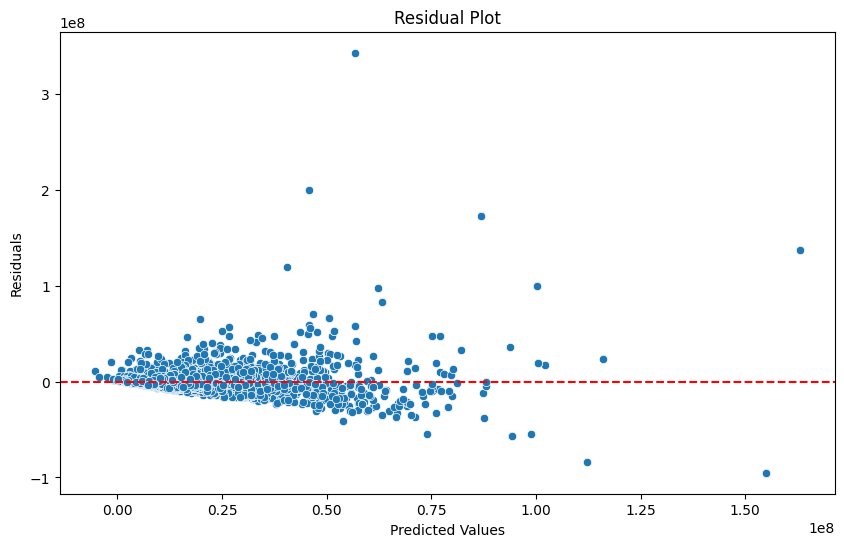

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = Y_test - Y_linear_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_linear_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


DECISION TREE

In [121]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [122]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': ['sqrt', 'log2']
}

In [123]:
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(estimator=dtr,param_distributions=param_grid,n_iter=20,cv=5)

In [124]:
cv.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=20,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]})

In [125]:
print(f"Best Parameters: {cv.best_params_}")
print(f"Best Score: {cv.best_score_}")

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'squared_error'}
Best Score: 0.6472087630090143


In [126]:
cv.best_estimator_

DecisionTreeRegressor(max_depth=10, max_features='sqrt')

In [127]:
best_dtree = cv.best_estimator_

In [128]:
y_dtr_pred = best_dtree.predict(X_test)

In [130]:
mse_dtr = mean_squared_error(Y_test, y_dtr_pred)
r2_dtr = r2_score(Y_test, y_dtr_pred)

print(f"Mean Squared Error: {mse_dtr}")
print(f"R^2 Score: {r2_dtr}")


Mean Squared Error: 106245434568896.34
R^2 Score: 0.6568405877307251


RANDOM FOREST

In [135]:
df.columns

Index(['Property', 'BHK', 'Bathrooms', 'Property_Type', 'Area(Sq.ft)',
       'Status', 'Region', 'Locality', 'Details', 'Price'],
      dtype='object')

In [136]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [142]:
param_distributions = {
    'n_estimators':[1,20,30,40,50,90,100,250,300,400,450,500],  # Randomly sample from 50 to 500
    'max_depth': list(range(10, 51, 10)),  # None or 10, 20, 30, 40, 50
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,8,10],
    'criterion': ['squared_error', 'absolute_error','friedman_mse']  # Mean Squared Error or Mean Absolute Error
}


In [ ]:
reduced_param_distributions = {
    'n_estimators': [100, 200, 300],  # Reduced options
    'max_depth': [None, 10, 20],  # Reduced options
    'min_samples_split': [2, 5],  # Reduced options
    'min_samples_leaf': [1, 2],  # Reduced options
    'criterion': ['squared_error']  # Keep the most common criterion
}

In [143]:
random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_distributions,
    n_iter=20,  # Number of random combinations to try
    cv=5,       # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Scoring metric
    random_state=42,
    n_jobs=-1
)

In [144]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 4, 8, 10,
                                                             15],
                                        'min_samples_split': [2, 5, 10, 25, 50],
                                        'n_estimators': [1, 20, 30, 40, 50, 90,
                                                         100, 250, 300, 400,
                                                         450, 500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [145]:
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Best Parameters: {'n_estimators': 20, 'min_samples_split': 50, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'squared_error'}
Best Score: -104606817364197.75


In [146]:
best_rf = random_search.best_estimator_

In [147]:
y_rfr_pred = best_rf.predict(X_test)

In [148]:
mse_rfr = mean_squared_error(Y_test, y_rfr_pred)
r2_rfr = r2_score(Y_test, y_rfr_pred)
print(f"Mean Squared Error: {mse_rfr}")
print(f"R^2 Score: {r2_rfr}")

Mean Squared Error: 110120128821630.23
R^2 Score: 0.6443258118451874
